In [1]:
from kuramoto import Kuramoto
from kuramoto.nmf import *
from NNetwork import NNetwork as nn

import networkx as nx

In [68]:
def adj_to_coladj(adj_mat, dynamics):
    col_adj = np.zeros((adj_mat.shape[0], adj_mat.shape[1]))
    for i in range(adj_mat.shape[0]):
        for j in range(i, adj_mat.shape[1]):
            if i == j or adj_mat[i][j] == 0:
                col_adj[i][j] = 0
                col_adj[j][i] = 0
            if adj_mat[i][j] == 1:
                a = abs(dynamics[j] - dynamics[i])
                b = abs(2*np.pi + (dynamics[j] - dynamics[i]))
                col_adj[i][j] = min(a, b)
                col_adj[j][i] = min(a, b)
                
    return col_adj

In [2]:
sampling_alg = 'pivot'

ntwk = 'UCLA26' # COVID_PPI, Wisconsin87, Caltech36, UCLA26
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'images/'
k = 50

path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

num nodes in G 20467
num edges in G 1495226


num of subgraphs induced on k-paths: 2500
X.shape (2500, 2500)


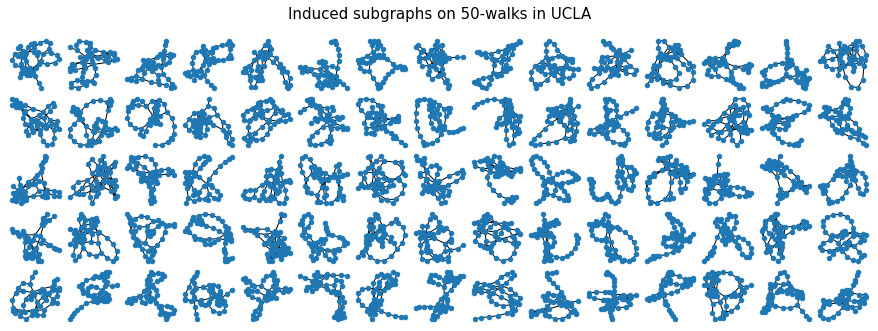

In [3]:
X, embs = G.get_patches(k=k, sample_size=2500, skip_folded_hom=True)

display_graphs(title='Induced subgraphs on {}-walks in {}'.format(k, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X, embs],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

In [4]:
graph_list = generate_nxg(X)
print(f"num of graphs: {len(graph_list)}")

num of graphs: 2500


In [5]:
nodes = int(np.sqrt(X.shape[0]))
df = pd.DataFrame()
K = 5

for G in graph_list:
        
    if nx.is_connected(G):

        model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)
        adj_mat = nx.to_numpy_array(G)
        sim = model.run(adj_mat)
        
        
        # temp = pd.DataFrame(np.array(nx.adjacency_matrix(G).todense().flatten('C')))
        col_adj = adj_to_coladj(adj, dynamics)
        

        sim = model.run(adj_mat)
        arr = sim.T[-1]
        conc = pd.DataFrame(pd.Series(synchronization(arr)), columns=['Synchronized'])
            
        temp = pd.concat([temp, conc], axis=1)

        df = pd.concat([df, temp], ignore_index=True)
    
df

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,Synchronized
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,True
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,True
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
2496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,True
2497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,False
2498,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True


In [6]:
print(f"% of synchronized cases: {sum(df['Synchronized'])/len(df)}")

% of synchronized cases: 0.472


In [9]:
df = gen_KM(50, 2500, edge_var='L')

In [10]:
df

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,...,s50_124,s50_125,s50_126,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Baseline,Synchronized
0,5.447364,5.450098,5.452839,5.455589,5.458346,5.461111,5.463885,5.466665,5.469454,5.472250,...,5.935621,5.935197,5.934794,824,50,26,39,2,1,1
1,1.488199,1.488235,1.488287,1.488355,1.488439,1.488540,1.488657,1.488791,1.488941,1.489108,...,3.423755,3.421805,3.419862,736,50,20,37,2,1,1
2,0.797526,0.799293,0.801075,0.802874,0.804689,0.806522,0.808370,0.810236,0.812120,0.814021,...,3.761498,3.761292,3.761098,835,50,27,39,2,1,1
3,5.419627,5.420756,5.421912,5.423095,5.424305,5.425542,5.426808,5.428102,5.429424,5.430776,...,4.334876,4.335632,4.336404,836,50,25,40,2,1,1
4,6.271688,6.274428,6.277184,6.279956,6.282744,0.002363,0.005183,0.008020,0.010874,0.013745,...,2.028217,2.028563,2.028900,738,50,22,36,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.230169,0.228108,0.226055,0.224011,0.221976,0.219951,0.217934,0.215928,0.213931,0.211943,...,5.747148,5.755434,5.763646,735,50,21,35,2,0,1
2496,2.316412,2.312942,2.309421,2.305849,2.302226,2.298550,2.294821,2.291039,2.287201,2.283309,...,6.262479,6.266542,6.270571,638,50,20,32,2,1,1
2497,5.591874,5.597169,5.602510,5.607898,5.613332,5.618813,5.624340,5.629914,5.635534,5.641200,...,0.639999,0.639310,0.638626,743,50,23,37,2,0,1
2498,0.873899,0.870082,0.866250,0.862402,0.858538,0.854658,0.850763,0.846851,0.842922,0.838977,...,4.900456,4.899732,4.899009,641,50,21,31,2,0,1


In [12]:
import seaborn as sns

In [13]:
def adj_to_coladj(adj_mat, dynamics):
    col_adj = np.zeros((adj_mat.shape[0], adj_mat.shape[1]))
    for i in range(adj_mat.shape[0]):
        for j in range(i, adj_mat.shape[1]):
            if i == j or adj_mat[i][j] == 0:
                col_adj[i][j] = 0
                col_adj[j][i] = 0
            if adj_mat[i][j] == 1:
                a = abs(dynamics[j] - dynamics[i])
                b = abs(2*np.pi + (dynamics[j] - dynamics[i]))
                col_adj[i][j] = min(a, b)
                col_adj[j][i] = min(a, b)
                
    return col_adj

In [61]:
model = Kuramoto(
    coupling=10,
    dt=0.05,
    T=10000,
    n_nodes=50,
    base_iter=126,
    half_sync=False
)

In [62]:
G = nx.newman_watts_strogatz_graph(50, 10, 0.35)
adj = nx.to_numpy_array(G)
sim = model.run(adj)

In [63]:
model.concentrated

True

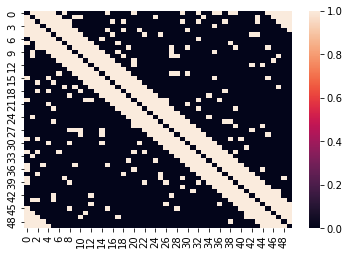

In [64]:
sns.heatmap(adj);

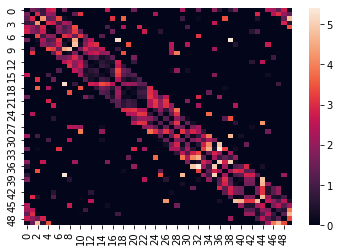

In [65]:
dynamics = sim.T[0]
col_adj = adj_to_coladj(adj, dynamics)
sns.heatmap(col_adj);

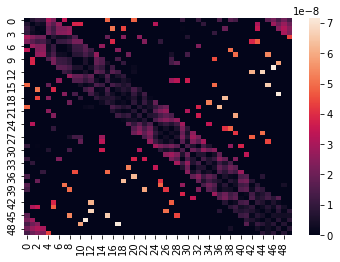

In [66]:
dynamics = sim.T[125]
col_adj = adj_to_coladj(adj, dynamics)
sns.heatmap(col_adj);

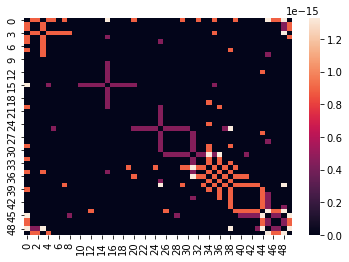

In [67]:
dynamics = sim.T[-1]
col_adj = adj_to_coladj(adj, dynamics)
sns.heatmap(col_adj);

In [70]:
model = Kuramoto(
    coupling=10,
    dt=0.01,
    T=18,
    n_nodes=50,
    base_iter=126,
    half_sync=False
)

In [151]:
G = nx.grid_2d_graph(8, 8)
adj = nx.to_numpy_array(G)

In [152]:
model = Kuramoto(
    coupling=10,
    dt=0.01,
    T=18,
    n_nodes=64,
    base_iter=126,
    half_sync=False
)

sim = model.run(adj)

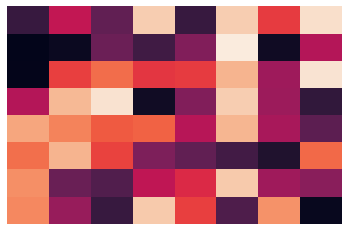

In [153]:
sns.heatmap(sim.T[0].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

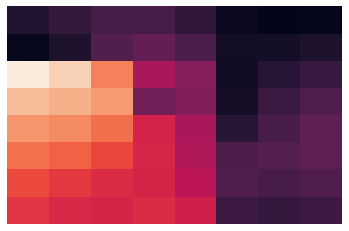

In [154]:
sns.heatmap(sim.T[65].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

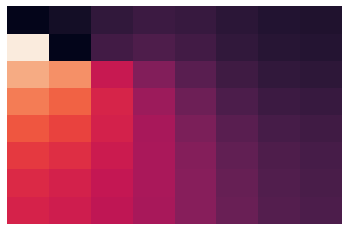

In [155]:
sns.heatmap(sim.T[130].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

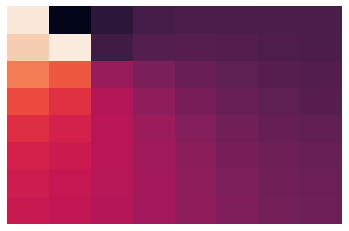

In [159]:
sns.heatmap(sim.T[300].reshape(8, 8), cbar=False, xticklabels=False, yticklabels=False);

In [105]:
model.baseline

False

In [112]:
sim.T[-1].reshape(10, 8)

array([[5.7480923 , 5.74738014, 5.74687152, 5.74657744, 5.74650998,
        5.74668054, 5.74709791, 5.74776654],
       [5.75061869, 5.74996049, 5.74948606, 5.74920665, 5.74913488,
        5.74928294, 5.74966043, 5.75027257],
       [5.75630398, 5.75576858, 5.75537365, 5.75513058, 5.75505274,
        5.75515338, 5.75544344, 5.75592946],
       [5.76452891, 5.76417169, 5.7638928 , 5.76370365, 5.76361841,
        5.76365174, 5.76381622, 5.76412014],
       [5.774397  , 5.77425392, 5.77411491, 5.77399131, 5.77389813,
        5.77385151, 5.7738659 , 5.77395157],
       [5.7848323 , 5.78491598, 5.78492548, 5.78487195, 5.78477118,
        5.78464073, 5.78449692, 5.78435199],
       [5.79469673, 5.79499509, 5.7951456 , 5.79515917, 5.79505213,
        5.79484325, 5.79455044, 5.79418775],
       [5.80291421, 5.80339183, 5.80366063, 5.80373118, 5.80362009,
        5.80334692, 5.80293073, 5.80238691],
       [5.80858814, 5.80919011, 5.80954176, 5.80965321, 5.80954101,
        5.80922495, 5.808724

In [113]:
sim.T[-1]

array([5.7480923 , 5.74738014, 5.74687152, 5.74657744, 5.74650998,
       5.74668054, 5.74709791, 5.74776654, 5.75061869, 5.74996049,
       5.74948606, 5.74920665, 5.74913488, 5.74928294, 5.74966043,
       5.75027257, 5.75630398, 5.75576858, 5.75537365, 5.75513058,
       5.75505274, 5.75515338, 5.75544344, 5.75592946, 5.76452891,
       5.76417169, 5.7638928 , 5.76370365, 5.76361841, 5.76365174,
       5.76381622, 5.76412014, 5.774397  , 5.77425392, 5.77411491,
       5.77399131, 5.77389813, 5.77385151, 5.7738659 , 5.77395157,
       5.7848323 , 5.78491598, 5.78492548, 5.78487195, 5.78477118,
       5.78464073, 5.78449692, 5.78435199, 5.79469673, 5.79499509,
       5.7951456 , 5.79515917, 5.79505213, 5.79484325, 5.79455044,
       5.79418775, 5.80291421, 5.80339183, 5.80366063, 5.80373118,
       5.80362009, 5.80334692, 5.80293073, 5.80238691, 5.80858814,
       5.80919011, 5.80954176, 5.80965321, 5.80954101, 5.80922495,
       5.80872462, 5.80805615, 5.81109914, 5.81175709, 5.81214